In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import shap


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
heart_df = pd.read_csv('data.csv')

heart_df

y = heart_df['output']
X = heart_df.drop(columns='output')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=58)

logmodel = LogisticRegression()


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

logmodel.fit(X_train_scaled, y_train)


LogisticRegression()

In [5]:
explainer = shap.Explainer(logmodel, X_train_scaled)

instance_idx = 44
shap_values = explainer(X_train_scaled.iloc[[instance_idx]])


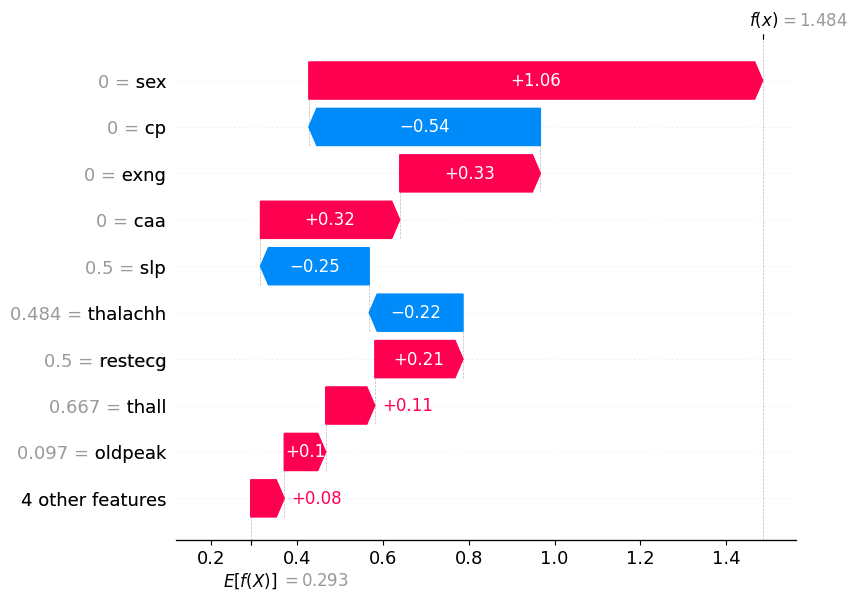

In [6]:
shap.waterfall_plot(shap_values[0])

plt.show()

In [7]:
from sklearn.metrics import classification_report

y_pred = logmodel.predict(X_test_scaled)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[34, 10],
       [ 4, 43]])

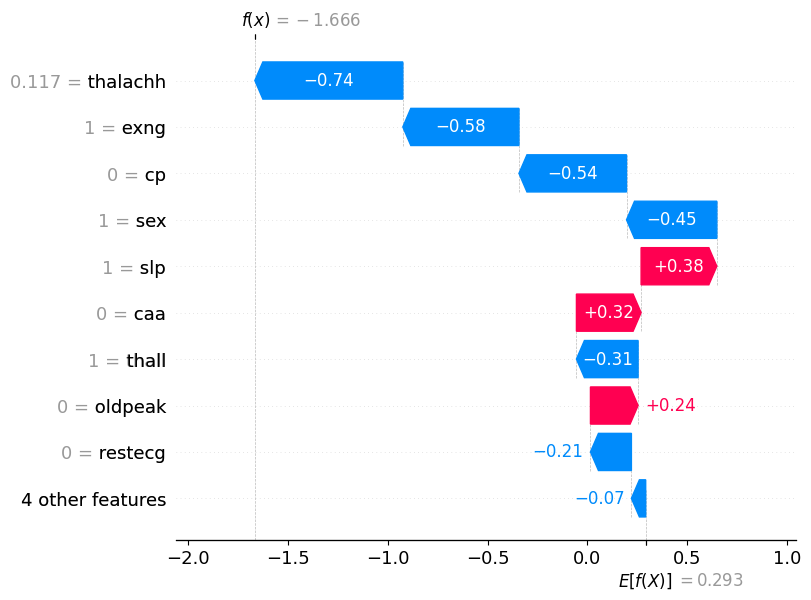

In [9]:
test_idx = 3
test_values = explainer(X_test_scaled.iloc[[test_idx]])

shap.waterfall_plot(test_values[0])
plt.show()

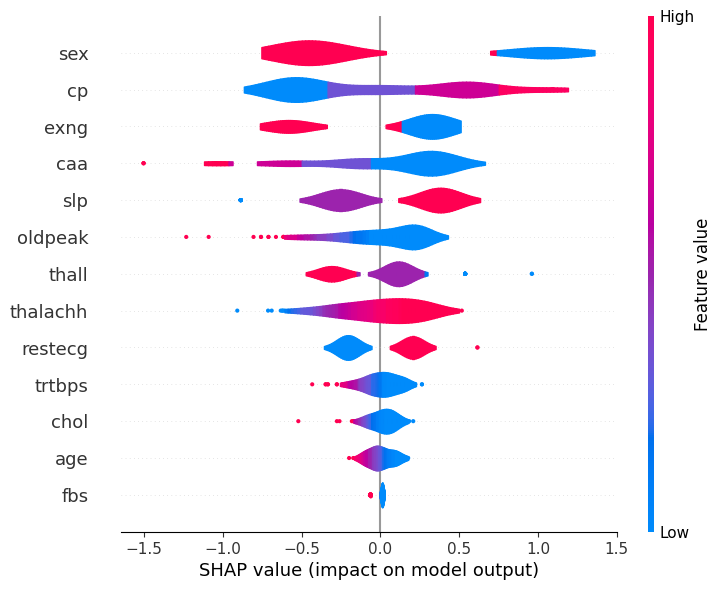

In [13]:
shap_values_violin = explainer(X_train_scaled)
shap.plots.violin(shap_values_violin)


In [38]:
# from matplotlib import rcParams

# rcParams['figure.figsize'] = (100, 5)

# shap.waterfall_plot(test_values[0])
# shap.violin_plot(shap_values_violin)
# plt.show()